# Project: Investigate a Dataset - European Soccer

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
>This dataset contains data for soccer teams and players centered in the European clubs. Due to the significant popularity and dynamism of European Soccer in the recent decades, this dataset shows to be the most interesting data we can analyze. This dynamism will be discussed by using a club team in Europe as a case study which has gone through significant changes over the period when this data was collected. The context of the data, which has been taken from the [Kaggle source](https://www.kaggle.com/hugomathien/soccer), is as follows:
><ul>
    <li>+25,000 matches</li>
    <li>+10,000 players</li>
    <li>11 European Countries with their lead championship</li>
    <li>Seasons 2008 to 2016</li>
    <li>Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates</li>
    <li>and more..</li>
</ul> 

>Below are the list of tables and their columns:<ul>
    <li>**Country**</li>
    <ul>
        <li>*ID*: Country ID.</li>
        <li>*Unique Values*: Name of the Country.</li>
    </ul>
    <li>**League**</li>
    <ul>
        <li>*ID*: Same as Country Id.</li>
        <li>*Country ID*: IDs same as ids mapped to country name.</li>
        <li>*Name*: Name of the League</li>
    </ul>
    <li>**Match** (Due to the high number of columns, only the columns used are described)</li>
    <ul>
        <li>*ID*, *country_id*, *league_id*: All mapped to Country ID.</li>
        <li>*season*: Years this season spanned (ex: 2008/2009)</li>
        <li>*stage*: The stage of competition whent this match was played (First week = Stage 1).</li>
        <li>*date*: Date the data was recorded.</li>
        <li>*match_api_id*: unique id for the match.</li>
        <li>*home_team_api_id*: ID of the team that played at home.</li>
        <li>*away_team_api_id*: ID of the team that played away from home stadium.</li>
        <li>*home_team_goal*: Goals scored by the home team.</li>
        <li>*away_team_goal*: Goals scored by the away team.</li>
        <li>*home_player_[1...11]*: Unique ID provided to every player of the home team.</li>
        <li>*away_player_[1...11]*: Unique ID provided to every player of the away team.</li>
    </ul>
    <li>**Player**</li>
    <ul>
        <li>*player_api_id*, *player_fifa_api_id*: Unique ID for the player.</li>
        <li>*player_name*: Name of the Player</li>
        <li>*birthday*: Day of birth of the player, another way of saying age of player.</li>
        <li>*height*: Height of the player</li>
        <li>*weight*: Weight of the player</li>
    </ul>
    <li>**Player Attributes** *(Not used in analysis so save time by not explaining here, can be found on the Kaggle page.)*</li>
    <li>**Team**</li>
    <ul>
        <li>*id*, *player_api_id*, *player_fifa_api_id*: Unique ID for the player.</li>
        <li>*team_long_name*, *team_short_name*: Names and abbreviations of respective teams.</li>
    </ul>
    <li>**Team Attributes**</li>
    <ul>
        <li>Id columns: Matches respective teams to their stats per season.</li>
        <li>*date*: Date data was recorded. Can be presumed to be the season this data was representing.</li>
        <li>*buildUpPlaySpeed*, *buildUpPlaySpeedClass*: Gives a score for the speed the team moves the ball from their side to the other side (Balanced, Fast). </li>
        <li>*buildUpPlayDribbling*, *buildUpPlayDribblingClass*: Score of how well players in team can carry the ball from one side to other (Little, Normal).</li>
        <li>*buildUpPlayPassing*, *buildUpPlayPassingClass*: Score of how well players in team can pass their way from one side to other. (Short, Mixed, Long)</li>
        <li>*chanceCreationPassing*, *chanceCreationPassingClass*: Score on the quality of ball placement through passing that provides goal scoring chance. (Safe, Normal, Risky)</li>
        <li>*chanceCreationCrossing*, *chanceCreationCrossingClass*: Score on the quality of ball placement through corner that provides goal scoring chance.(Normal, Lots)</li>
        <li>*chanceCreationShooting*, *chanceCreationShootingClass*: Scores on how many times the ball was shot at the goal (Normal, Lots).</li>
        <li>*defencePressure*, *defencePressureClass*: Where on the field the team puts pressure defensively.(Deep, Medium, High)</li>
        <li>*defenceAggression*, *defenceAggressionClass*: Score of aggressiveness the team is on the ball on defense.(Press and Double)</li>
        <li>*defenceTeamWidth*, *defenceTeamWidthClass*: How much the team was spread out on the field when defending. (Normal, Wide)</li>
    </ul>
</ul>

>**NOTE**: The scores provided for the Team and Player Attributes are calculated by FIFA Video Game series developed by EA Sports. These scores are usually highly reflective of players' performance on the field and is used extensively by the soccer community.

### Question(s) for Analysis
> In the early 2008 season, Manchester City FC (MCFC) was acquired by the Abu Dhabi United Group, a private equity company from Abu Dhabi that is run by the royals of the oil-rich country. Thanks to the significant wealth of the trust, MCFC became one of the wealthiest clubs in European Football, which they used to chart their way to dominate European Football. This success has not only translated to trophies, but also an extremely valuable brand that has raked in billions, which, in turn, funds the success of the team and its owners. The success of this model has pushed other ultra wealthy individuals to try and build similar brand success stories. However, the change in financial fortunes did not necessarily mean change in footballing fortunes, as shown by another big-oil owned club: [Malaga FC](https://en.wikipedia.org/wiki/M%C3%A1laga_CF) of Spanish Liga Premiere. So the main question to dig into would be what made Manchester City so successful? Some of the questions posed to dig into this would be **How did the team's performance in goals and wins change in the seasons after acquisition? What were the underlying attributes in the team that led to this performance?** This analysis will define success as the number of games won and the number of goals scored.

Below are the libraries that will be used to work with the data throughout the project. Since the raw data is stored in SQLite, the **sqlite3** library will be used instead of csv. 

**IMPORTANT: BEFORE RUNNING THE SQL STATMENTS BELOW, PLEASE DOWNLOAD THE DATASET FILE FROM KAGGLE. YOU CAN GO TO [THIS](https://www.kaggle.com/hugomathien/soccer) SITE AND CLICK DOWNLOAD UNDER THE JUMBOTRON**

In [1]:
# Important Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

# magic word
%matplotlib inline 

In [2]:
 %pip install --upgrade pandas==0.25.0

In [3]:
import os 
path_db = os.getcwd() + "/database.sqlite"
conn = sqlite3.connect(path_db)

In [4]:
# Gets rid of the unncessary warnings. It was done after writing and checking the notebook correctness.
import warnings
warnings.filterwarnings('ignore')

<a id='wrangling'></a>
## Data Wrangling

### Data Extraction

Below we extract the data for all the databases available and their columns.

In [5]:
# Country Data
country_df = pd.read_sql("SELECT * FROM Country", conn)
country_df.head(1)

,id,name
0,1,Belgium


In [6]:
# League Data
league_df = pd.read_sql("SELECT * FROM League", conn)
league_df.head(1)

,id,country_id,name
0,1,1,Belgium Jupiler League


In [7]:
# Match Data
home_players = ("home_player_1", "home_player_2", "home_player_3", "home_player_4", "home_player_5", 
                "home_player_6", "home_player_7", "home_player_8", "home_player_9", "home_player_10", 
                "home_player_11")
away_players = ("away_player_1", "away_player_2", "away_player_3", "away_player_4", "away_player_5", 
                "away_player_6", "away_player_7", "away_player_8", "away_player_9", "away_player_10", 
                "away_player_11")
matches_query = """
SELECT country_id, season, date, stage, home_team_api_id, away_team_api_id, home_team_goal, away_team_goal, 
{x}, {y}
FROM Match
"""
home_players_str = ", ".join(home_players)
away_players_str = ", ".join(away_players)
matches_query = matches_query.format(x=home_players_str, y=away_players_str)
match_players = pd.read_sql(matches_query, conn)
match_players.head(1)

,country_id,season,date,stage,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,home_player_2,...,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
0,1,2008/2009,2008-08-17 00:00:00,1,9987,9993,1,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The columns chosen in **Match** data were filtered from the lists based on the descriptions on the [kaggle](https://www.kaggle.com/hugomathien/soccer) page. Otherwise, nearly 115 columns would need to be downloaded. Most of these columns have the extremely important data.

In [8]:
# Player Data
players_query = """
SELECT player_api_id, player_name, height, weight
FROM Player
"""
players_df = pd.read_sql(players_query, conn)
players_df.head(1)

,player_api_id,player_name,height,weight
0,505942,Aaron Appindangoye,182.88,187


In [9]:
# Player Attributes Data
player_attr_query = """
SELECT player_api_id, overall_rating
FROM Player_Attributes
"""
player_attr_df = pd.read_sql(player_attr_query, conn)

In [10]:
# Team Data
team_query = """
SELECT team_api_id, team_long_name, team_short_name
FROM Team
"""
teams_df = pd.read_sql(team_query, conn)
teams_df.head(1)

,team_api_id,team_long_name,team_short_name
0,9987,KRC Genk,GEN


In [11]:
# Team Attributes Data
team_attr_df = pd.read_sql("SELECT * FROM Team_Attributes", conn)
team_attr_df.head(1)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover


### Preliminary Data Exploration

#### Country Data

In [12]:
country_df

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


#### League Data

In [13]:
league_df

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [14]:
league_df.shape[0] == country_df.shape[0]

True

The **League** data and **Country** data have the same *country_id* and would be better off merged together.

#### Matches Data
This is the most important data set since it contains the important variables to success *home_team_goal* and *away_team_goal*. These two columns can be used to derive many more features like wins, ties, points, etc.

In [15]:
match_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country_id        25979 non-null  int64  
 1   season            25979 non-null  object 
 2   date              25979 non-null  object 
 3   stage             25979 non-null  int64  
 4   home_team_api_id  25979 non-null  int64  
 5   away_team_api_id  25979 non-null  int64  
 6   home_team_goal    25979 non-null  int64  
 7   away_team_goal    25979 non-null  int64  
 8   home_player_1     24755 non-null  float64
 9   home_player_2     24664 non-null  float64
 10  home_player_3     24698 non-null  float64
 11  home_player_4     24656 non-null  float64
 12  home_player_5     24663 non-null  float64
 13  home_player_6     24654 non-null  float64
 14  home_player_7     24752 non-null  float64
 15  home_player_8     24670 non-null  float64
 16  home_player_9     24706 non-null  float6

Outside of the player ids, all the other features are fully populated. This data can be merged with country and league data to make it more expressive.

The players ids for each team will likely not be used in to analyze causes of success due to many of the points missing and missing inconsistently. However, it should not be too difficult to find the data online, since most of the games in the seasons covered are well documented on the internet. With all our datasets, we already have many variables to compare, so we will not be pursuing analyzing team victories by players. Players, however, would be a great piece of analysis for any future in-depth look, and can be done by melting all the players ids data.

#### Teams and Team Attributes Data

In [16]:
teams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   team_api_id      299 non-null    int64 
 1   team_long_name   299 non-null    object
 2   team_short_name  299 non-null    object
dtypes: int64(1), object(2)
memory usage: 7.1+ KB


In [17]:
team_attr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

Other than *buildUpPlayDribbling* all other features are well recorded. Due to it's high proportion of missing data, *buildUpPlayDribbling* can be dropped and its class variables will have to do.

While in its original form the date is not very useful, it can be utilized to find the season these attributes were recorded, thus creating a link between matches and team attributes by season.

Additionally, the two dataframes can be merged.

### Data Cleaning

#### League Data and Country Data
Start by merging **Country** and **League** data and store it in *countryleague_df*. Then, rename columns with more detailed names and drop *id* since it is redundant.

In [18]:
countryleague_df = pd.merge(country_df, league_df, how="inner", left_on="id", right_on="id")
countryleague_df.drop(columns=["id"], inplace=True)
countryleague_df.rename(columns={"name_x":"country", "name_y":"League"}, inplace=True)
countryleague_df

,country,country_id,League
0,Belgium,1,Belgium Jupiler League
1,England,1729,England Premier League
2,France,4769,France Ligue 1
3,Germany,7809,Germany 1. Bundesliga
4,Italy,10257,Italy Serie A
5,Netherlands,13274,Netherlands Eredivisie
6,Poland,15722,Poland Ekstraklasa
7,Portugal,17642,Portugal Liga ZON Sagres
8,Scotland,19694,Scotland Premier League
9,Spain,21518,Spain LIGA BBVA


### Matches Data
The next dataframe to deal with is the **Match** dataframe. Due to it's importance, care should be taken to wrangle it.

The first task would be to merge it with countryleague_df and store it in **matches_df**.

In [19]:
matches_df = pd.merge(countryleague_df, match_players, on="country_id")

In [20]:
match_players.shape[0]

25979

As said before, the player impact will not be looked at in this analysis as soccer is a team sport, thus making team more important, and there also being a lot of other important variables to analyze. The home and away players columns will be dropped.

In [21]:
matches_df.drop(columns=[player for player in home_players], inplace=True)
matches_df.drop(columns=[player for player in away_players], inplace=True)

### Team Data
After exploring the data in both the team dataframes, we can start by dropping the *buildUpPlayDribbling* column in **Team Attributes**.

In [22]:
team_attr_df2 = team_attr_df.drop(columns=["buildUpPlayDribbling"])
team_attr_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              1458 non-null   int64 
 1   team_fifa_api_id                1458 non-null   int64 
 2   team_api_id                     1458 non-null   int64 
 3   date                            1458 non-null   object
 4   buildUpPlaySpeed                1458 non-null   int64 
 5   buildUpPlaySpeedClass           1458 non-null   object
 6   buildUpPlayDribblingClass       1458 non-null   object
 7   buildUpPlayPassing              1458 non-null   int64 
 8   buildUpPlayPassingClass         1458 non-null   object
 9   buildUpPlayPositioningClass     1458 non-null   object
 10  chanceCreationPassing           1458 non-null   int64 
 11  chanceCreationPassingClass      1458 non-null   object
 12  chanceCreationCrossing          1458 non-null   

The **Teams** and **Team Attributes** data can be merged for more simplicity.

In [23]:
team_name_attr_df = pd.merge(teams_df, team_attr_df2, on="team_api_id")
team_name_attr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1457
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   team_api_id                     1458 non-null   int64 
 1   team_long_name                  1458 non-null   object
 2   team_short_name                 1458 non-null   object
 3   id                              1458 non-null   int64 
 4   team_fifa_api_id                1458 non-null   int64 
 5   date                            1458 non-null   object
 6   buildUpPlaySpeed                1458 non-null   int64 
 7   buildUpPlaySpeedClass           1458 non-null   object
 8   buildUpPlayDribblingClass       1458 non-null   object
 9   buildUpPlayPassing              1458 non-null   int64 
 10  buildUpPlayPassingClass         1458 non-null   object
 11  buildUpPlayPositioningClass     1458 non-null   object
 12  chanceCreationPassing           1458 non-null   

Drop *id* and *team_fifa_api_id* which are redundant and unnecessary.

In [24]:
team_name_attr_df.drop(columns=["id", "team_fifa_api_id"], inplace=True)

In [25]:
# Check the number of remaining columns
team_name_attr_df.dtypes.size

24

Use the *date* column to create a *season* column.

In [26]:
def date_time_to_season(element):
    if (element.month >= 8):
        return "{}/{}".format(element.year, element.year+1)
    return "{}/{}".format(element.year-1, element.year)

team_name_attr_df["season"] = pd.to_datetime(team_name_attr_df["date"]).apply(date_time_to_season)
team_name_attr_df.head(1)

,team_api_id,team_long_name,team_short_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,...,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,season
0,9987,KRC Genk,GEN,2010-02-22 00:00:00,45,Balanced,Little,45,Mixed,Organised,...,Normal,Organised,70,High,65,Press,70,Wide,Cover,2009/2010


<a id='eda'></a>
## Exploratory Data Analysis


### How did the team's performance in goals and wins change in the seasons after acquisition?

The most basic way to analyze improvement in a team's performance is by looking at the points gained and wins and ties achieved. The team with most points in a season will win the league that season. All these features can be engineered using the *home_team_goal* and *away_team_goal* features.

This should be start by querying Manchester City matches from the **match_players** dataframe. Since half matches are played at home and half away, the corresponding matches will be stored in separate variable.

In [27]:
mc_team_id = teams_df.query("team_long_name == 'Manchester City'")["team_api_id"].values[0]
mc_home_games = matches_df.query("home_team_api_id=={}".format(mc_team_id))
mc_away_games = matches_df.query("away_team_api_id=={}".format(mc_team_id))
mc_home_games.head(1)

,country,country_id,League,season,date,stage,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
1763,England,1729,England Premier League,2008/2009,2008-11-09 00:00:00,12,8456,8586,1,2


In [28]:
mc_home_games.rename(columns={"home_team_goal":"goals_scored", "away_team_goal":"goals_conceded"}, 
                     inplace=True)
mc_away_games.rename(columns={"home_team_goal":"goals_conceded", "away_team_goal":"goals_scored"}, 
                     inplace=True)

In [29]:
mc_home_games["match_won"] = (mc_home_games["goals_scored"] > mc_home_games["goals_conceded"]).astype(int)
mc_home_games["match_tied"] = (mc_home_games["goals_scored"] == mc_home_games["goals_conceded"]).astype(int)
mc_away_games["match_won"] = (mc_away_games["goals_scored"] > mc_away_games["goals_conceded"]).astype(int)
mc_away_games["match_tied"] = (mc_away_games["goals_scored"] == mc_away_games["goals_conceded"]).astype(int)

In [30]:
mc_home_games["goals_delta"] = mc_home_games["goals_scored"] - mc_home_games["goals_conceded"]
mc_away_games["goals_delta"] = mc_away_games["goals_scored"] - mc_away_games["goals_conceded"]

In [31]:
mc_home_games.dtypes.size == mc_away_games.dtypes.size

True

Drop the date column as it is unnecessary for now.

Delete the City api ID from the *home_team_api_id* and *away_team_api_id* respectively as they all point to Manchester City's id, and then change the opposing teams' api id to *opponent_api_id*. Since the endgame is to append the columns of home and away datasets to make it simpler to work with data, each dataframe will have a new column *home_game* to indicate whether the game is played at home or not.

In [32]:
# Drop the date column
mc_home_games.drop(columns=["date"], inplace=True)
mc_away_games.drop(columns=["date"], inplace=True)

# Clean up the column names and make ready for appending.
mc_home_games.drop(columns=["home_team_api_id"], inplace=True)
mc_home_games.rename(columns={"away_team_api_id": "opponent_api_id"}, inplace=True)
mc_home_games["home_game"] = 1
mc_away_games.drop(columns=["away_team_api_id"], inplace=True)
mc_away_games.rename(columns={"home_team_api_id": "opponent_api_id"}, inplace=True)
mc_away_games["home_game"] = 0

# Append Games
mc_games = mc_home_games.append(mc_away_games, ignore_index=True)

In [33]:
mc_games.head()

,country,country_id,League,season,stage,opponent_api_id,goals_scored,goals_conceded,match_won,match_tied,goals_delta,home_game
0,England,1729,England Premier League,2008/2009,12,8586,1,2,0,0,-1,1
1,England,1729,England Premier League,2008/2009,14,9825,3,0,1,0,3,1
2,England,1729,England Premier League,2008/2009,15,10260,0,1,0,0,-1,1
3,England,1729,England Premier League,2008/2009,17,8668,0,1,0,0,-1,1
4,England,1729,England Premier League,2008/2009,19,8667,5,1,1,0,4,1


A sanity check just to make sure all the seasons have the equal number of games recorded and all the data cells are populated.

In [34]:
mc_games.groupby("season").size()

season
2008/2009    38
2009/2010    38
2010/2011    38
2011/2012    38
2012/2013    38
2013/2014    38
2014/2015    38
2015/2016    38
dtype: int64

In [35]:
mc_games.isnull().sum()

country            0
country_id         0
League             0
season             0
stage              0
opponent_api_id    0
goals_scored       0
goals_conceded     0
match_won          0
match_tied         0
goals_delta        0
home_game          0
dtype: int64

All European leagues are won and lost based on the points system. The points system works as follows: Win = 3 points, Draw = 1 point, Loss = 0 points. The start should be checking how the total points earned by M.C. changed over the seasons.

In [36]:
def calculate_points(df):
    win_points = df["match_won"].sum() * 3
    tie_points = df["match_tied"].sum() * 1
    return win_points + tie_points

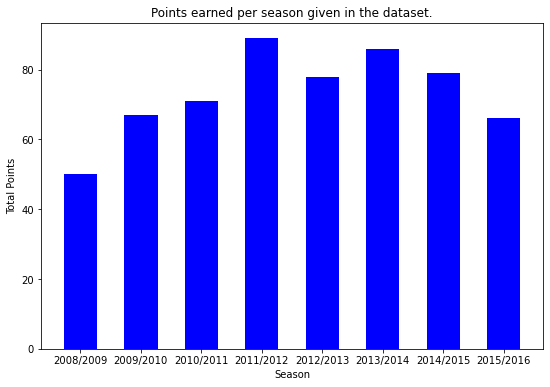

In [37]:
points_per_season = mc_games.groupby("season").apply(calculate_points)

plt.figure(figsize=(9,6))
plt.bar(x=points_per_season.index, height=points_per_season.values, width=0.55, color="blue")
plt.xlabel("Season")
plt.ylabel("Total Points")
plt.title("Points earned per season given in the dataset.")
plt.plot();

The data shows significant increase in the points accumulated throughout the EPL season, peaking in 2011/2012 season around 81 points, before dropping off at the end in a staggered manner, but still being significantly higher than the 2008/2009 season. Clearly there were changes made in 2008/2009 that saw a rise in success of the team. 

A more granular observation can be made by analyzing the games won and tied.

In [38]:
def calculate_non_losses(df):
    return df["match_won"].sum()+df["match_tied"].sum()

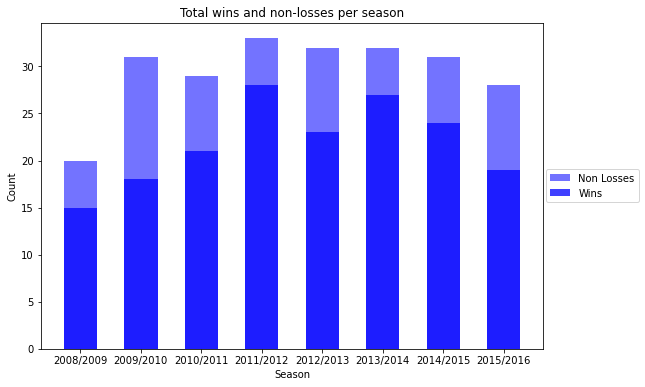

In [39]:
games_won_per_season = mc_games.groupby("season")["match_won"].sum()
non_loss_per_season = mc_games.groupby("season")[["match_won", "match_tied"]].apply(calculate_non_losses)
plt.figure(figsize=(9,6))
plt.bar(x=non_loss_per_season.index, height=non_loss_per_season.values, width=0.55, color="blue", 
        alpha=0.55, label="Non Losses")
plt.bar(x=games_won_per_season.index, height=games_won_per_season.values, width=0.55, color="blue", 
        alpha=0.75, label="Wins")
plt.xlabel("Season")
plt.ylabel("Count")
plt.title("Total wins and non-losses per season")
plt.legend(loc="right", bbox_to_anchor=(1.2, 0.5))
plt.plot();

The visual above shows a significant jump in non-losses from 2008/2009, but a leveling off after that season. However, the wins garnered shows a different view, following the general trend of the points garnered. This makes sense since wins have the most weight when calculating points. Along with growing absolute number of non losses, the proportion of wins to ties is also high between 2010 to 2015. This potentially points to another aspect of the performance of a team: entertainment.

For most people, the enjoyment of soccer comes from the goals scored, followed by the roaring celebrations and the ecstatic commentary. Thus, the next logical thing to analyze is the performance of the team by checking the goals scored and conceded.

In looking at the goals scored and goals conceded, we want to start by looking at the proportion of the goals scored to conceded. A higher proprtion shows a better performance in the season. We start that by using a pie chart.

In [40]:
def goals_scored_conceded_df(df):
    goals_scored_per_season = df.groupby("season")["goals_scored"].sum()
    goals_conceded_per_season = df.groupby("season")["goals_conceded"].sum()
    goals_df = pd.concat({"goals_scored": goals_scored_per_season, "goals_conceded": goals_conceded_per_season}, 
                         axis=1)
    return goals_df

In [41]:
mc_goals_df = goals_scored_conceded_df(mc_games)
goal_prop_df = mc_goals_df.apply(lambda x: x["goals_scored"] / x["goals_conceded"], axis=1)
goal_prop_df

season
2008/2009    1.160000
2009/2010    1.622222
2010/2011    1.818182
2011/2012    3.206897
2012/2013    1.941176
2013/2014    2.756757
2014/2015    2.184211
2015/2016    1.731707
dtype: float64

There was definitely a significant increase after 2008/2009, but has a slow drop off after 2012. This can be visualized with a pie chart.

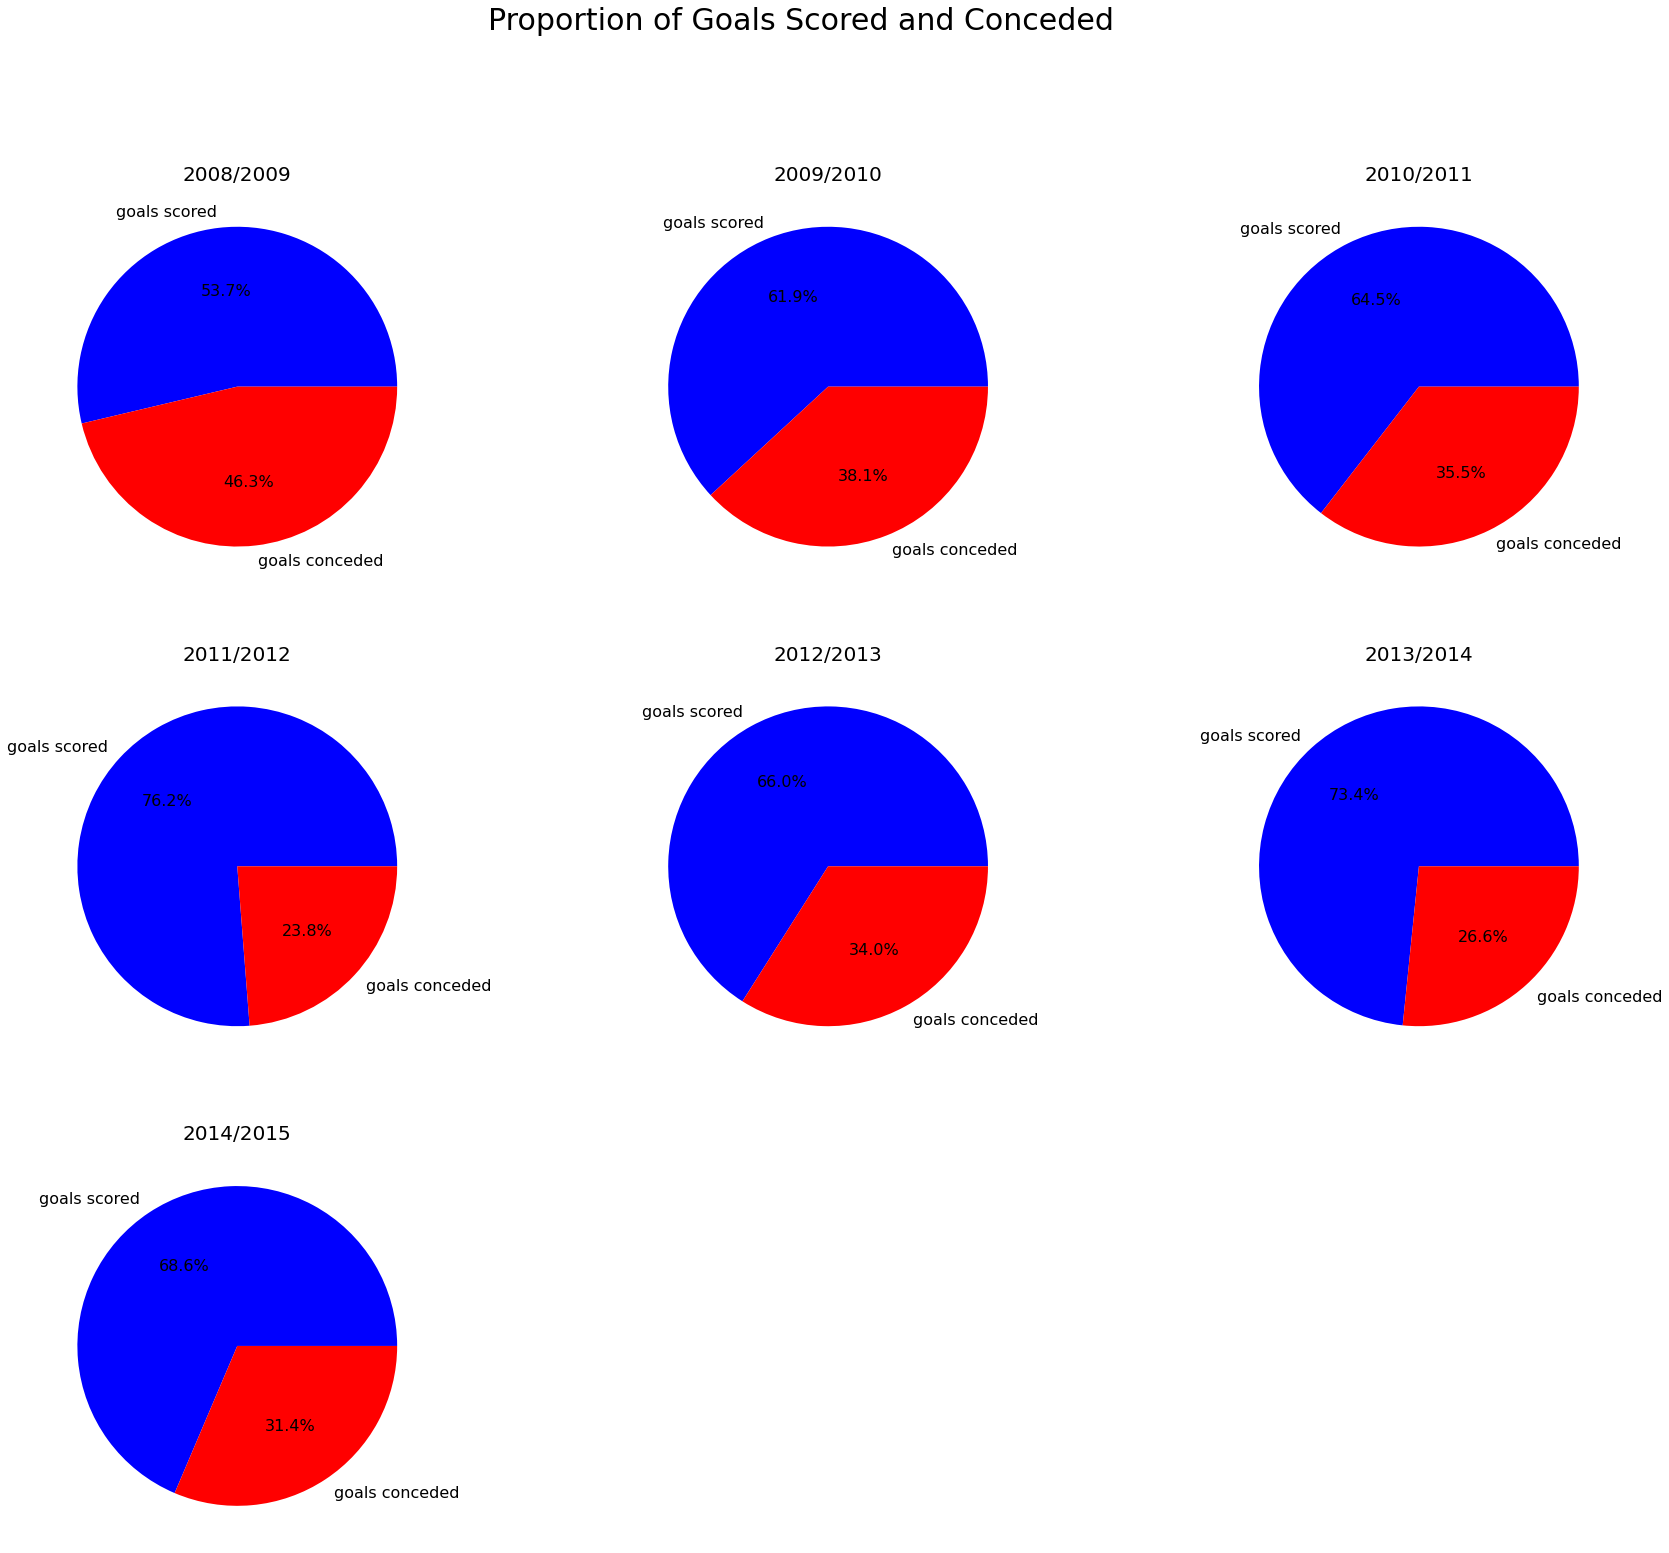

In [42]:
plt.figure(figsize=(30,25))
plt.suptitle('Proportion of Goals Scored and Conceded', size=30)

seasons = mc_goals_df.index.values

for index in range(1, mc_goals_df.shape[0]):
    plt.subplot(3, 3, index)
    plt.title(seasons[index-1], size=20)
    plt.pie(mc_goals_df.iloc[index-1,:].values, colors=["blue", "red"], labels=["goals scored", "goals conceded"],
           textprops={'fontsize': 16}, autopct='%1.1f%%')

plt.show();

After the 2008/2009 season, the goals scored significantly became a larger proportion of the goals scored in Manchester City's games. While this shows a potential improvement, we also need to look at the absolutes in terms of goals scored and conceded to get a good picture of the performance improvement.

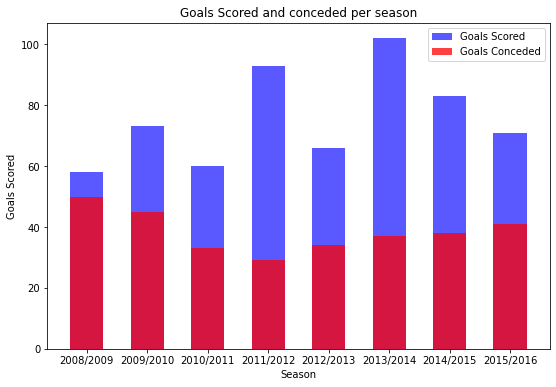

In [45]:
plt.figure(figsize=(9,6))
plt.bar(x=mc_goals_df.index, height=mc_goals_df["goals_scored"], width=0.55, color="blue", 
        alpha=0.65, label="Goals Scored")
plt.bar(x=mc_goals_df.index, height=mc_goals_df["goals_conceded"], width=0.55, color="red", 
        alpha=0.75, label="Goals Conceded")
plt.xlabel("Season")
plt.ylabel("Goals Scored")
plt.title("Goals Scored and conceded per season")
plt.legend()
plt.plot();

The first observation to that goals conceded fell until 2011/2012, followed by a slight rebound in concessions. While the goals conceded fell after 2008, something interesting to see is that the goals scored changed very eratically. So even though we saw an improvement in goals scored to conceded ratio, it depended more on conceding less goals in 2010/2011 and scoring significantly more goals in 2013/2014 season. Thus, one could say that seasons after 2010/2011 had a significant performance in both trophy results and entertainment value. One probable conjecture is that these were the years Manchester City's brand grew significantly.

So far we have been looking at the improvement made by Manchester City over the seasons, however, have these converted into visibile results, results being beating other teams in the league? We shall look at this by comparing the goals scored and conceded per game to that of the other teams in the season.

In [46]:
goals_scored_per_game = mc_games.groupby("season")["goals_scored"].mean()
goals_conceded_per_game = mc_games.groupby("season")["goals_conceded"].mean()

Compare the goals per game to other teams in the English Premier League.

In [47]:
# Curating the EPL data
epl_df = matches_df.query("League == '{}'".format("England Premier League"))
home_team_stats = epl_df[["season", "home_team_api_id", "home_team_goal", "away_team_goal"]]
home_team_stats.rename(columns={"home_team_api_id": "team_api_id", "home_team_goal": "goals_scored", 
                                "away_team_goal": "goals_conceded"}, inplace=True)
away_team_stats = epl_df[["season", "away_team_api_id", "home_team_goal", "away_team_goal"]]
away_team_stats.rename(columns={"away_team_api_id": "team_api_id", "home_team_goal": "goals_conceded", 
                                "away_team_goal": "goals_scored"}, inplace=True)

epl_match_stats = home_team_stats.append(away_team_stats)

In [48]:
epl_stats = epl_match_stats.groupby(["season", "team_api_id"], 
                                 as_index=False)[["goals_scored", "goals_conceded"]].mean()
seasons_recorded = goals_scored_per_game.index.values

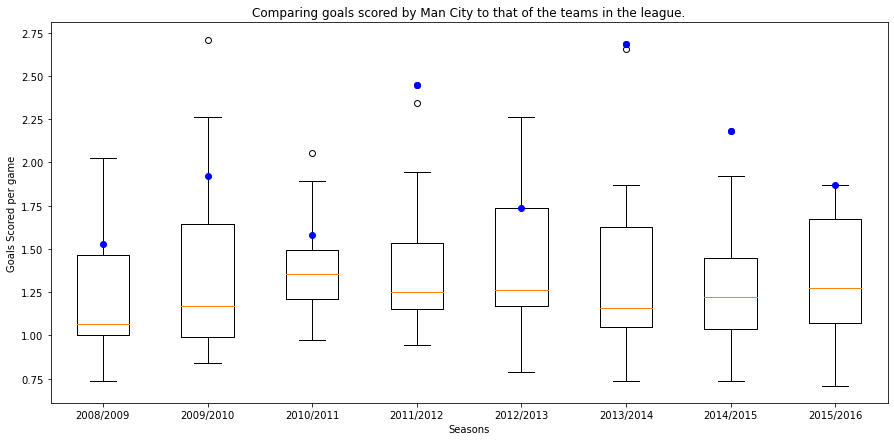

In [49]:
plt.figure(figsize=(15,7))
seasonal_scored_data = []
for season in seasons_recorded:
    season_data = epl_match_stats.query("season == '{}'".format(season))
    season_data_per_team = season_data.groupby("team_api_id")["goals_scored"].mean()
    seasonal_scored_data.append(season_data_per_team)

plt.boxplot(seasonal_scored_data, labels=seasons_recorded)
plt.xlabel("Seasons")
plt.ylabel("Goals Scored per game")
plt.title("Comparing goals scored by Man City to that of the teams in the league.")
plt.plot(range(1,9), goals_scored_per_game.values, "bo");

While always being above par, most of the years after 2010/2011 seasons showed Manchester City scoring outstandingly well.

Next we look at goals conceded. The lower the number, the better.

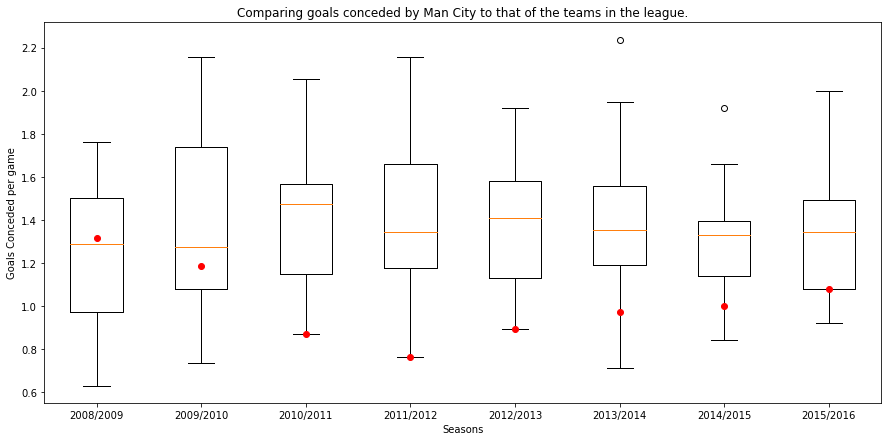

In [50]:
plt.figure(figsize=(15,7))
seasonal_conceded_data = []
for season in seasons_recorded:
    season_data = epl_match_stats.query("season == '{}'".format(season))
    season_data_per_team = season_data.groupby("team_api_id")["goals_conceded"].mean()
    seasonal_conceded_data.append(season_data_per_team)
    
plt.boxplot(seasonal_conceded_data, labels=seasons_recorded);
plt.xlabel("Seasons")
plt.ylabel("Goals Conceded per game")
plt.title("Comparing goals conceded by Man City to that of the teams in the league.")
plt.plot(range(1,9), goals_conceded_per_game.values, "ro");

As shown in the data above, Manchester City clearly have had a bigger problem with the goals conceded than with the goals being scored. In the earlier seasons Man City were sub-par to on-par with regards to goals conceded. However, they did show improvement and the seasons with the lowest goals conceded in relation to other teams were some of their best seasons. However, in the later seasons they start conceding goals again and with a low goals scored per season count throughout the league (inspite of excellent performance by Man City), the results started decreasing as shown by the points and games won.

### How did the different team attributes affect the success of the team?

Since we have more detail on the team composition, it is wise to check the effect the attributes had on the team performance. The attributes matched against will be goals scored to conceded ratio, goals scored per game and goals conceded per game. These three attributes combined, as shown in the previous question have a strong corellation to the success of the team. However, it is important to keep in mind that this data is seasonal based and each data point is for every season. On top of that, we have the 2008/2009 and 2013/2014 seasons missing in this data. This probably can be expanded upon with more recent data as we can find data for additional 5 years. Or, since this is data was generated well known third party called EA sports, we could potentially find data for 08/09 and 13/14 too.

We start by merging the **mc_games** and appropriate **team_name_attr_df** observations.

In [51]:
# Merging Manchester City games with the team attributes.
team_attr_data = team_name_attr_df.query("team_api_id == {}".format(mc_team_id))
mc_games_and_attr = pd.merge(left=mc_games, right=team_attr_data, on="season")

In [52]:
# Team attributes we will be testing against.
team_attributes = ["buildUpPlaySpeed", "buildUpPlayPassing", "chanceCreationPassing", "chanceCreationCrossing", 
              "chanceCreationShooting", "defencePressure", "defenceAggression", "defenceTeamWidth"]

Start by Comparing each attribute to the $goals\_scored \over goals\_conceded$.

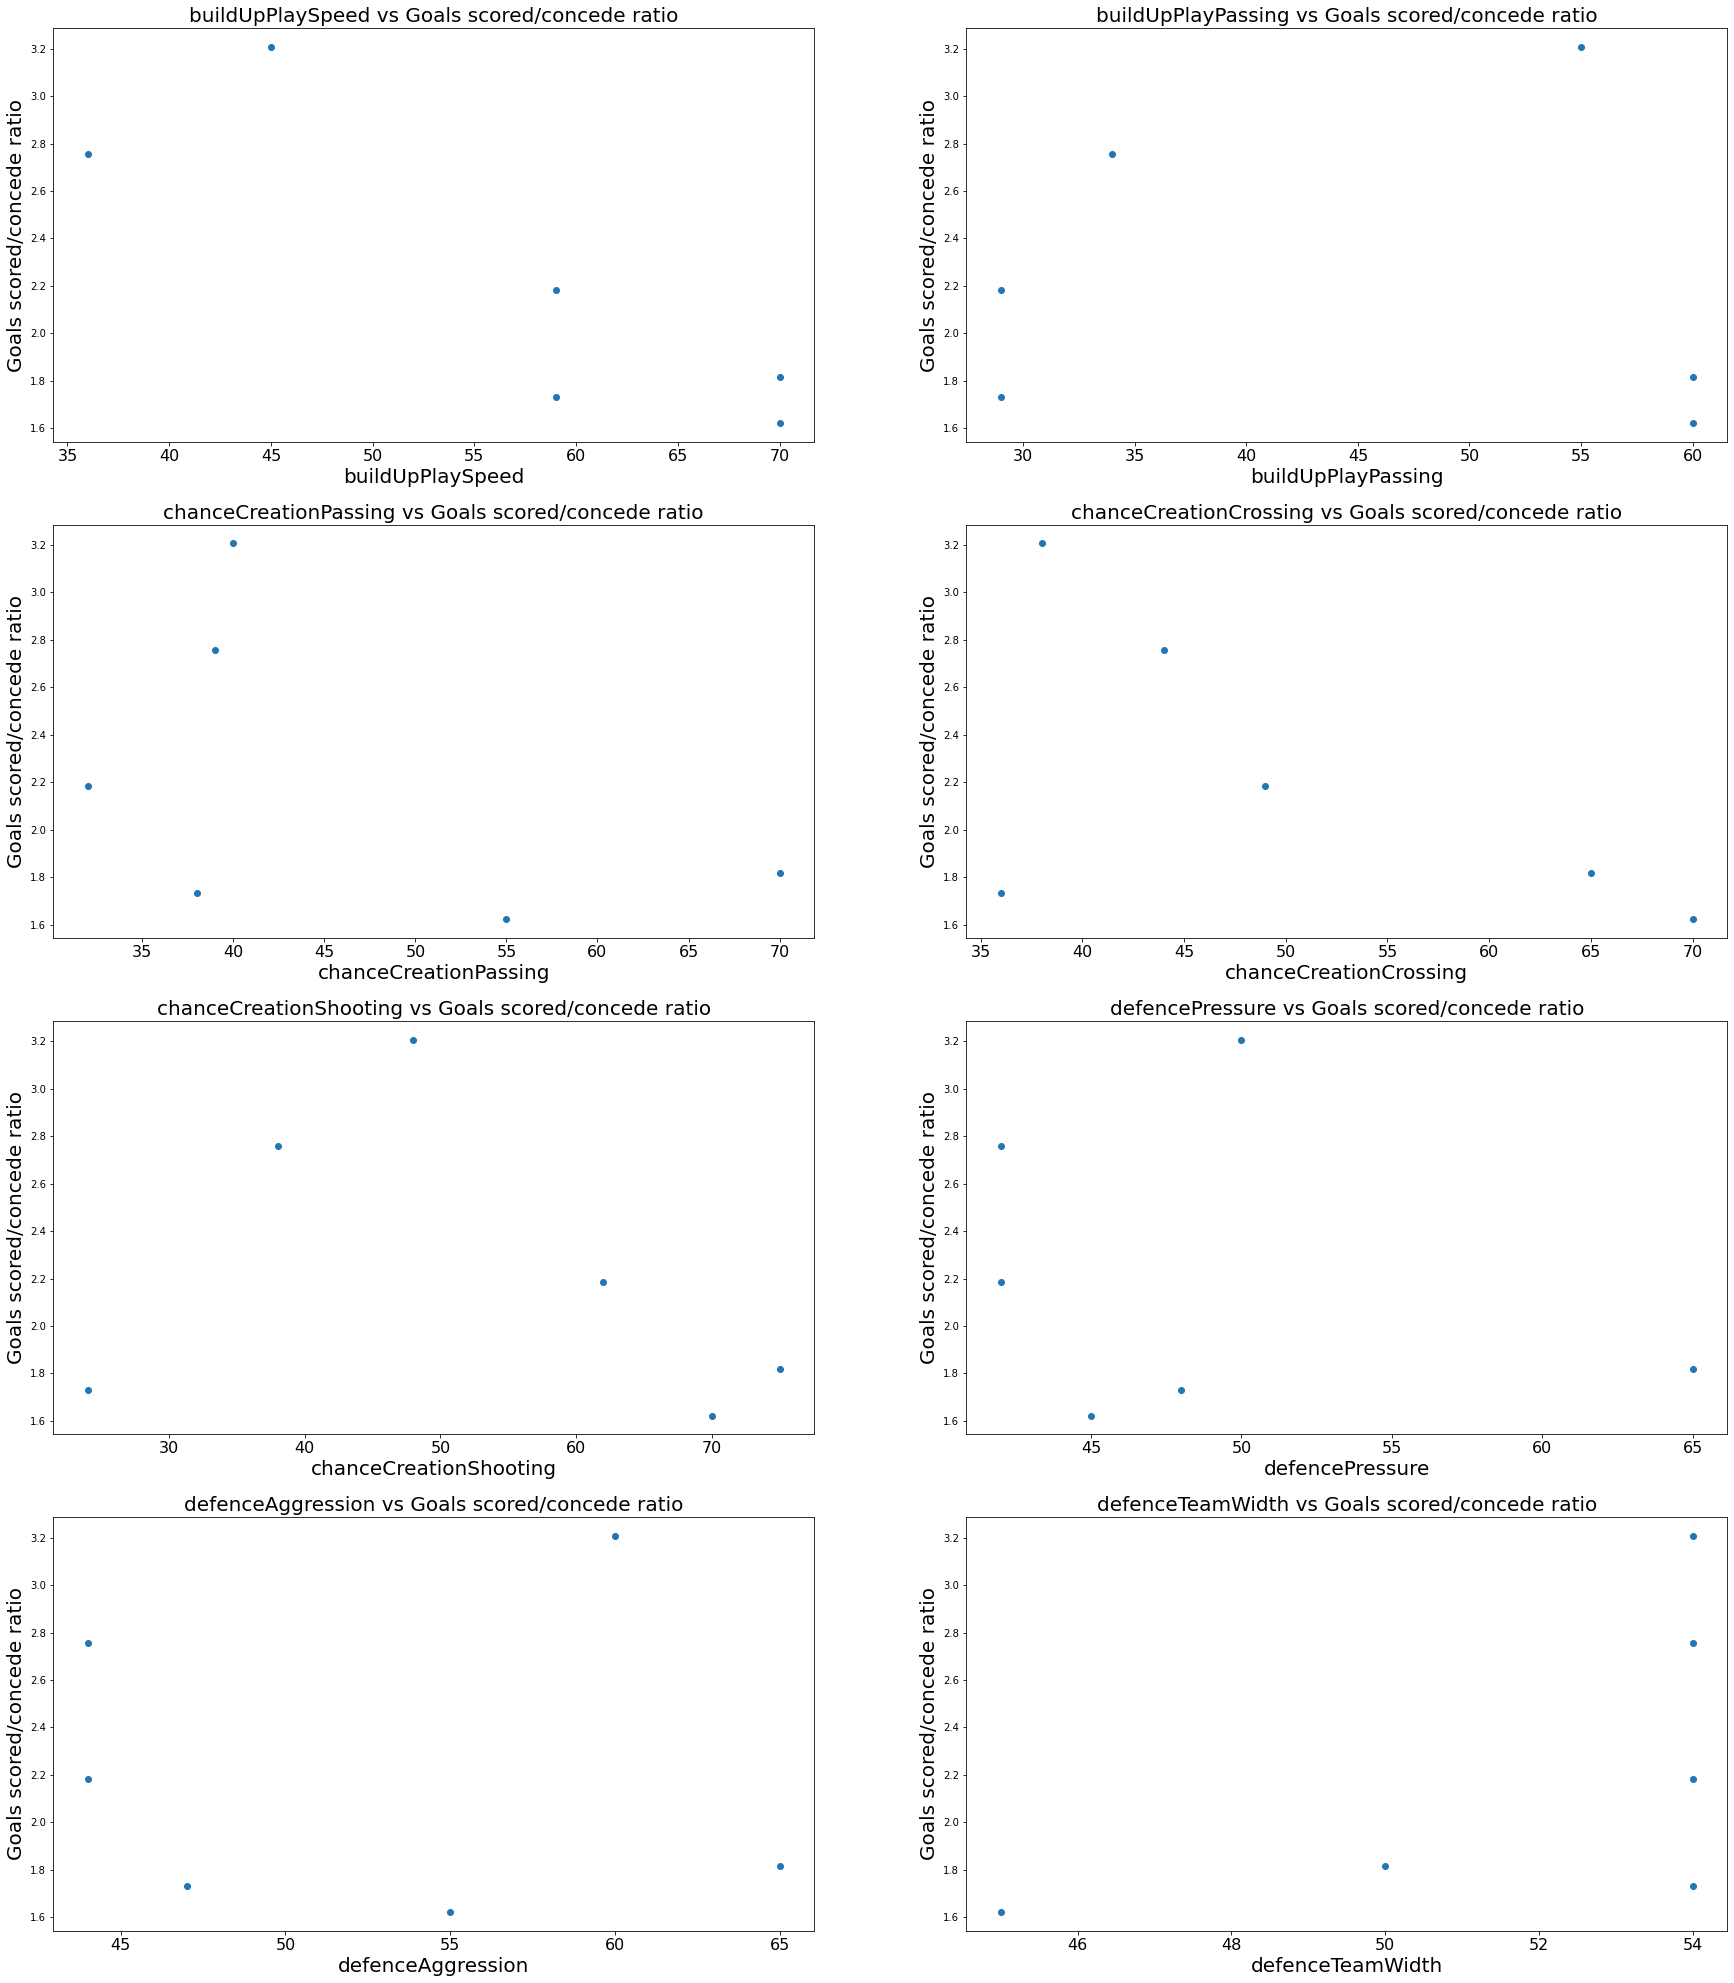

In [55]:
plt.figure(figsize=(30,35))
mc_goals_df2 = goals_scored_conceded_df(mc_games_and_attr)
mc_goals_scored_conceded_ratio = mc_goals_df2.apply(lambda x: x["goals_scored"]/x["goals_conceded"], axis=1)
for index, attribute in enumerate(team_attributes):
    attribute_data = mc_games_and_attr.groupby("season")[attribute].mean()
    plt.subplot(4, 2, index+1)
    plt.xlabel(attribute, size=20)
    plt.ylabel("Goals scored/concede ratio", size=20)
    plt.title(attribute+" vs Goals scored/concede ratio", size=20)
    plt.scatter(attribute_data.values, mc_goals_scored_conceded_ratio.values)
    plt.xticks(fontsize=16)

There are few data points as data of some seasons are missing. However, the general trends for *buildUpPlaySpeed*, *chanceCreationPassing*, *chanceCreationCrossing* and *defensePressure* seem to indicate a downward trend. This indicates that a more normal and controlled speed with short to medium passing, fewer crosses and middle of the line to higher up defensive pressure created the better chances for Manchester City to score than to concede. The *chanceCreationShooting* seems to indicate that shooting without too much risk or too much hesitancy gave the best results. The other variables are too varied and inconclusive as of now. However, all of the variables should be investigated with more detail.

Next, the impact on goals scored per game will be tested.

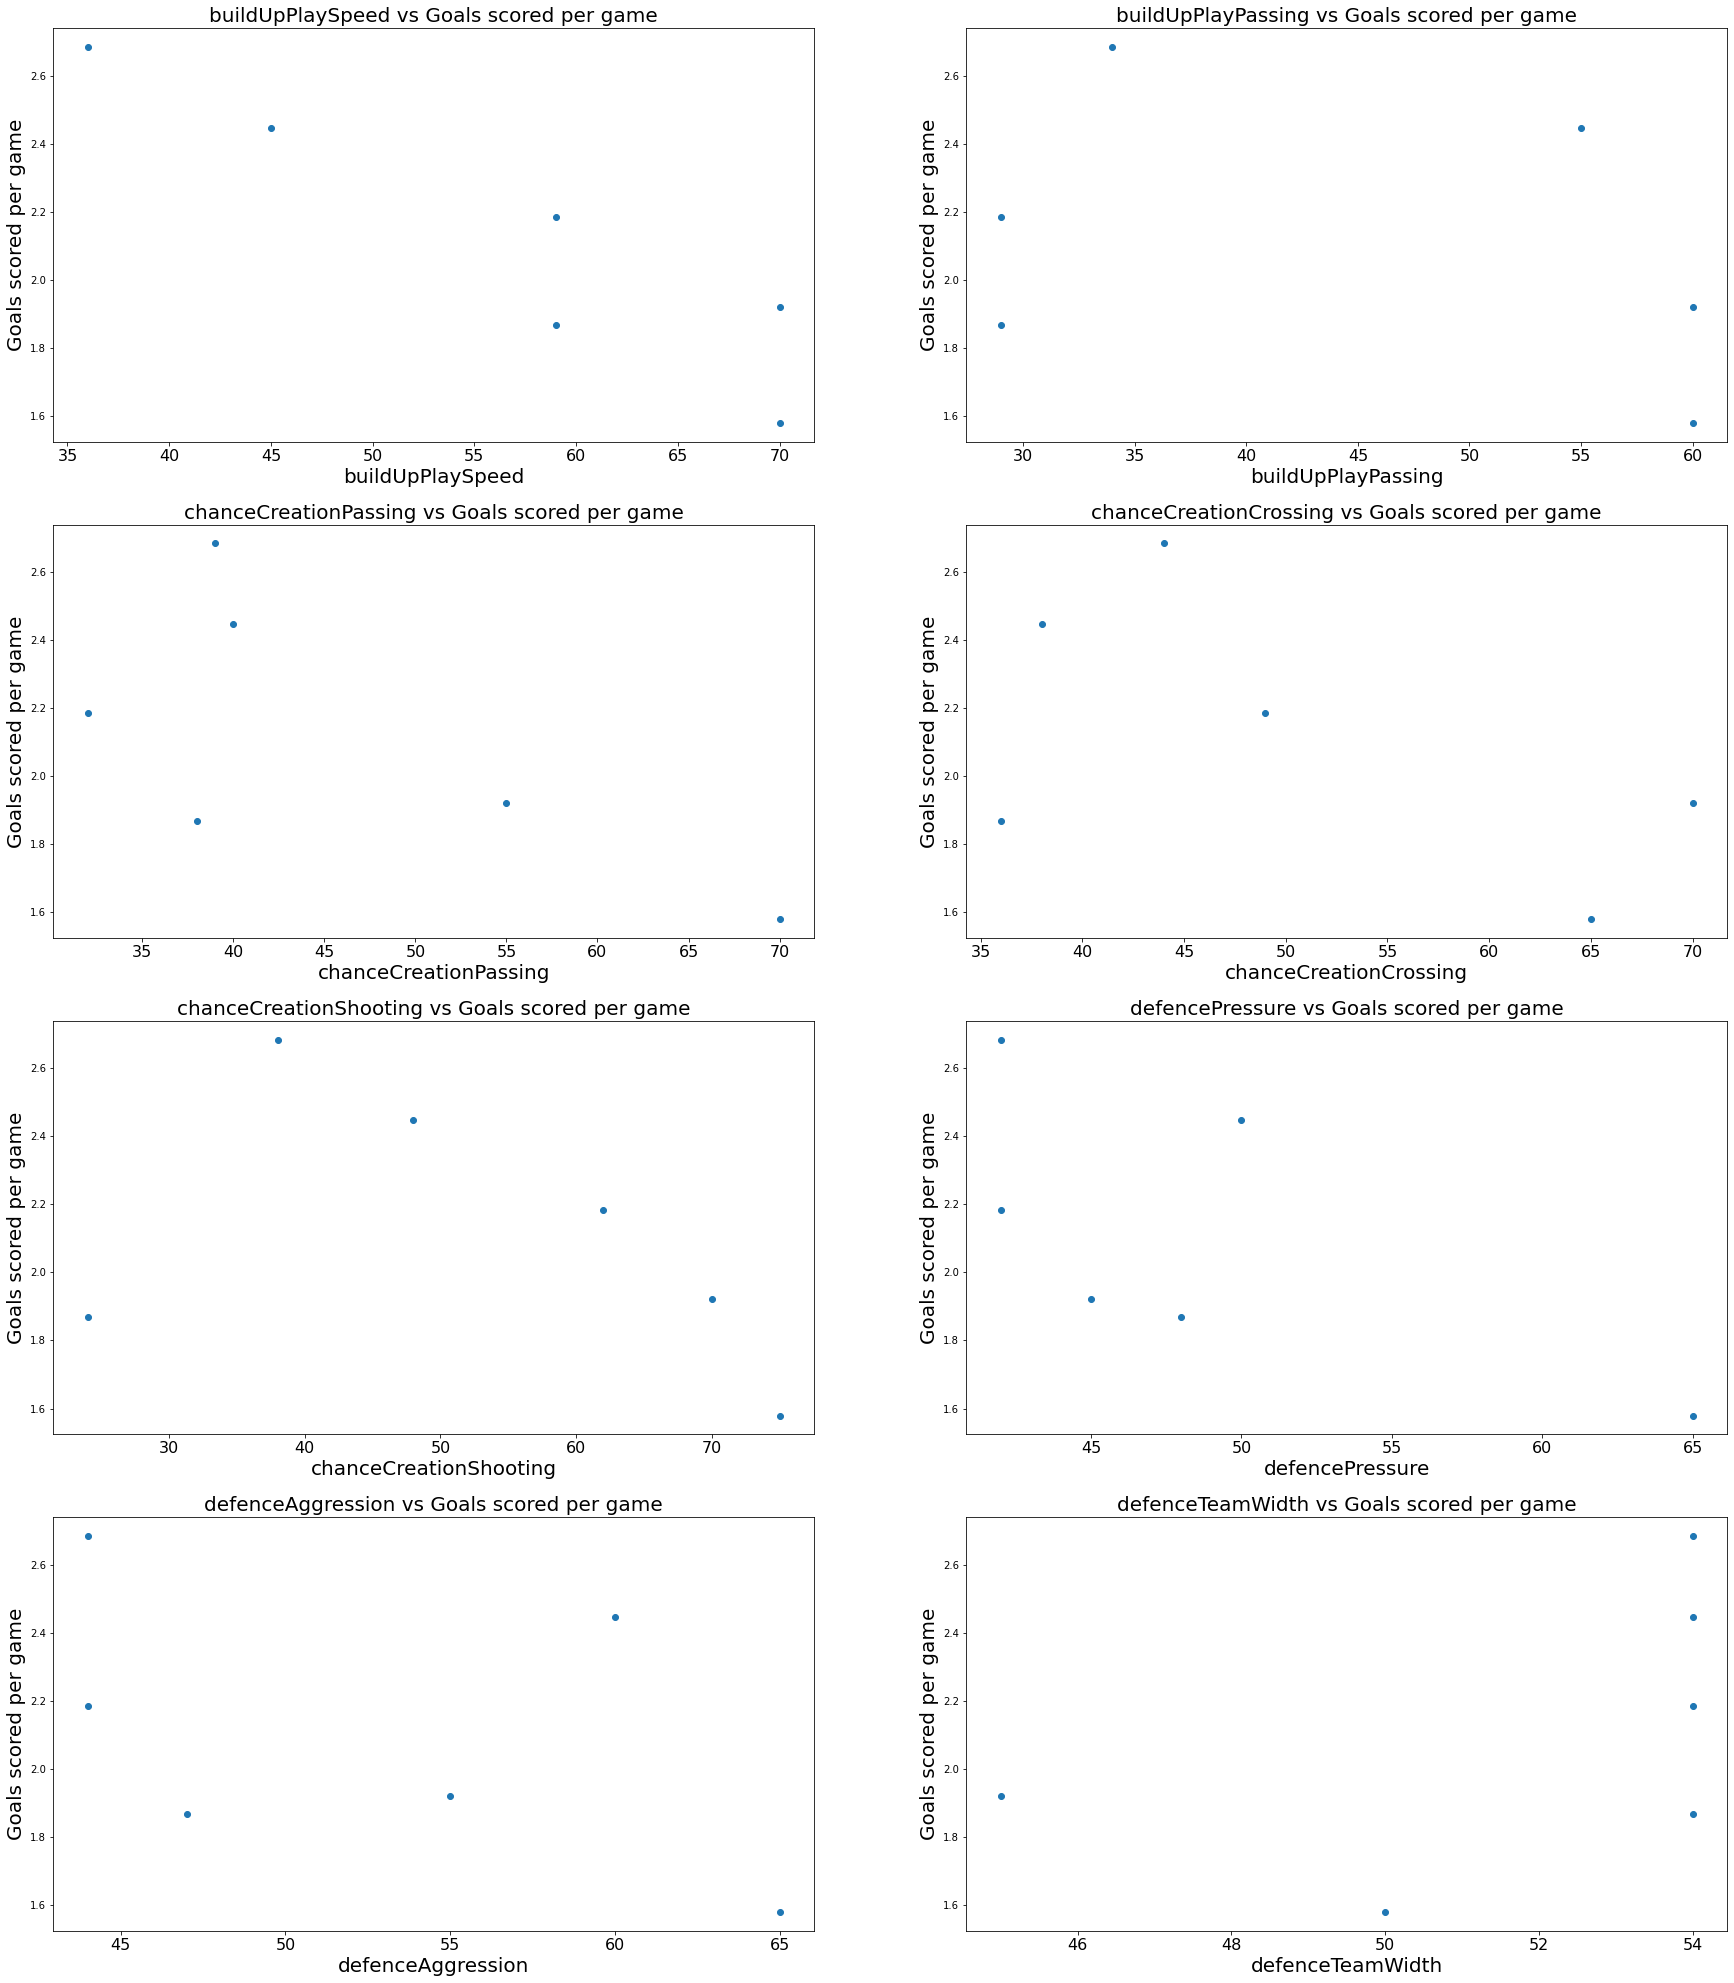

In [56]:
plt.figure(figsize=(30,35))
goals_scored_per_game = mc_goals_df2["goals_scored"]/38
for index, attribute in enumerate(team_attributes):
    attribute_data = mc_games_and_attr.groupby("season")[attribute].mean()
    plt.subplot(4, 2, index+1)
    plt.xlabel(attribute, size=20)
    plt.ylabel("Goals scored per game", size=20)
    plt.title(attribute+" vs Goals scored per game", size=20)
    plt.scatter(attribute_data.values, goals_scored_per_game.values)
    plt.xticks(fontsize=16)

The results are that show some corellation are *buildUpPlaySpeed*, *chanceCreationPassing*, *chanceCreationCrossing* and *defensePressure*. The preliminary results show that more balanced play speed, less riskier passing and fewer cross (which might go hand in hand) and middle of the line defensive pressure have shown the best results for Manchester City. This might mean that a more controlled (holding ball under control) and compact style of playing had the best impact on the team. This can also be seen by the *defenceWidth* which stayed rather constant in the middle.

Finally, the goals conceded per game will be tested.

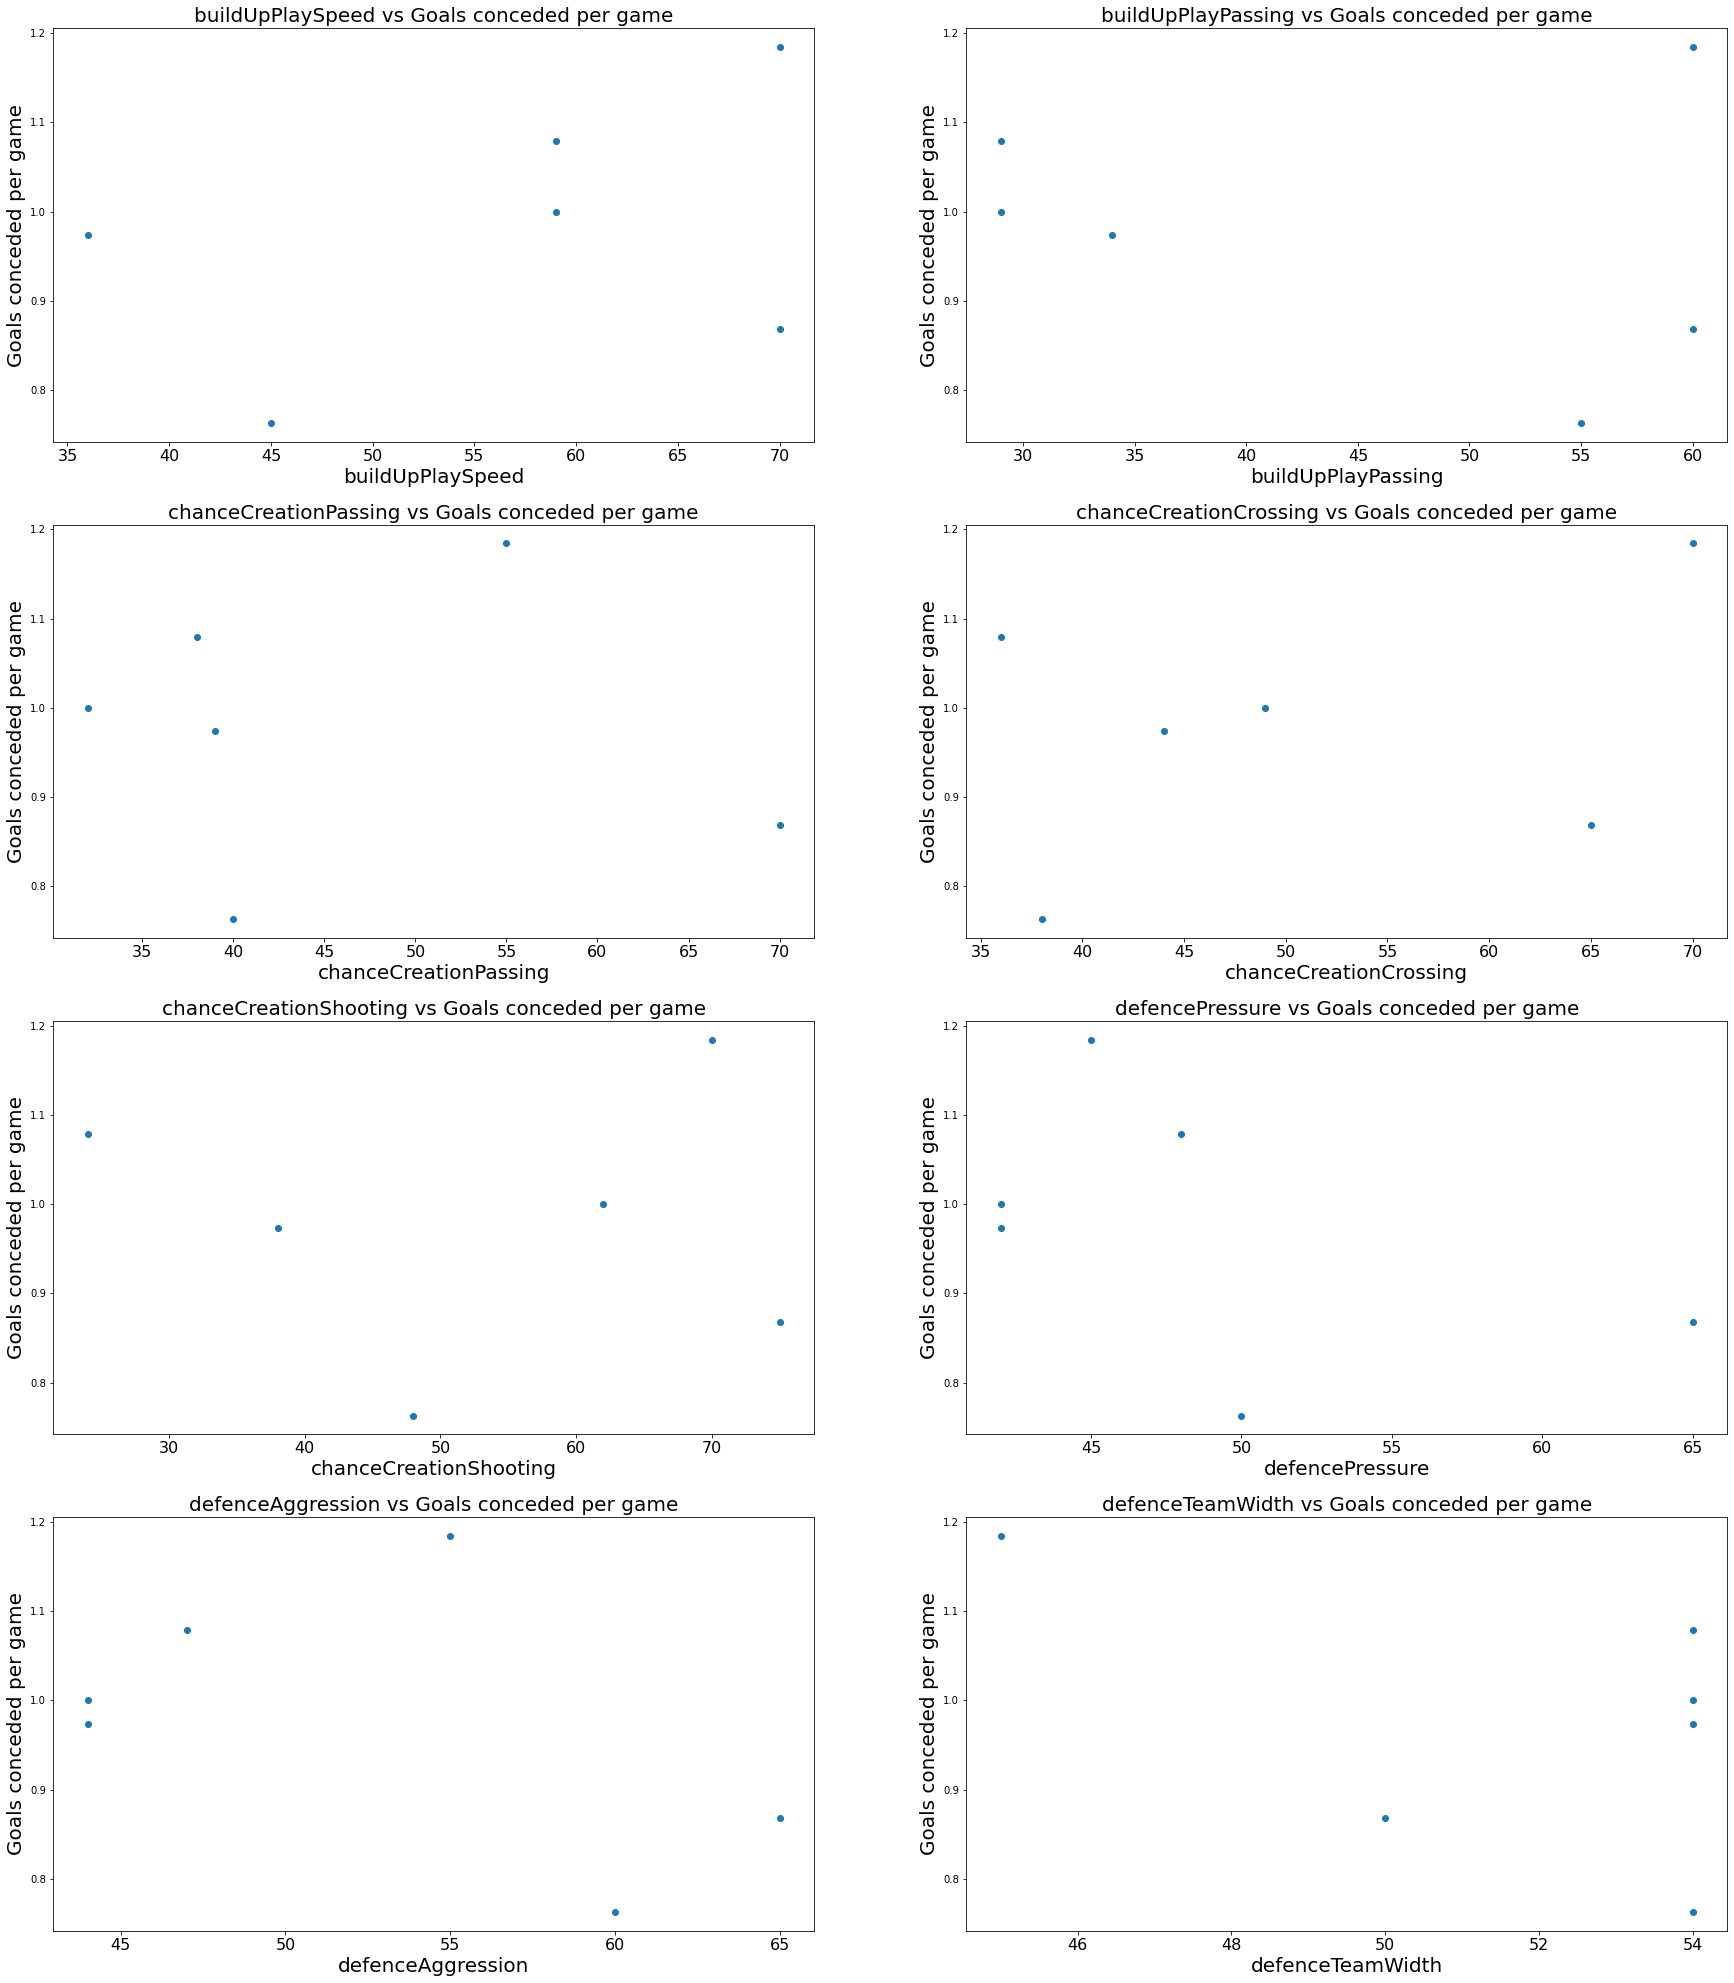

In [57]:
plt.figure(figsize=(30,35))
goals_conceded_per_game = mc_goals_df2["goals_conceded"]/38
for index, attribute in enumerate(team_attributes):
    attribute_data = mc_games_and_attr.groupby("season")[attribute].mean()
    plt.subplot(4, 2, index+1)
    plt.xlabel(attribute, size=20)
    plt.ylabel("Goals conceded per game", size=20)
    plt.title(attribute+" vs Goals conceded per game", size=20)
    plt.scatter(attribute_data.values, goals_conceded_per_game.values)
    plt.xticks(fontsize=16)

Due to the sparse data, we can again cannot make any corellations. However, there are some interesting correlations that are coming into picture with *buildUpPlaySpeed* which seems to be increasing the goals conceded with faster pace and *defensePressure* which seems to be decreasing the goals conceded per game as the pressure increases. While inconclusive, a reason fast play speed is leading to more concessions is that faster speed might be leading to more disorganized lineup, which might be effecting defense. The effect of defence pressure on less goals being conceded is self-explanatory. However, for the former, if the relationship regarding *buildUpPlaySpeed* and goals conceded is true, maybe the relations between play speed and defensive variables can be further explored to test the above hypothesis.

<a id='conclusions'></a>
## Conclusions

After the change in ownership of the Manchester City to the hands of Abu Dhabi United Group, it can be said with certainty that there has been a clear improvement in the quality of Manchester City's football and their rankings in the football heirarchy. From a weak season in 2008/2009 in points attained, wins garnered, and goals scored & conceded, they significantly took off with consistent improvement over the next 3-4 years reaching a high point in 2011/2012 season where their goals scored and goals conceded metrics all showed the best performance. No doubt that, it was the season when they took home the prestigious Premier League trophy that year, the first time in their history. This was again repeated in the 2013/2014 season as shown by their exceptional stats all throught the board, except for the goals conceded in comparision to the league maybe. This prestige along with the improvement in the goals scored per game, cemented their status in English and European football as one of the best teams, which brought with it worldwide fan following and massive brand, which in itself creates massive sales. Thus, one could say the investment of the new owners has paid of very well. However, it is important to also note that the money factor does not always play a role, as shown by the significant drop off we see in all metrics during and after 2014/2015 season. Other factors such as team attributes, coaches, players and management make a huge difference.

Analyzing the team factors the led to the success of Manchester City is difficult due to the little data that exists based seasonally. However, some factors like defense pressure impact on goals conceded and the chance creation shooting attribute's impact on scoring goals, seemed to show surprising trends and need to be investigated further.

### Limitations
The missing seasons in the attributes table was one limitation.

The biggest limitations here were the inconsistently missing player data, which hindered the analysis process based on players. However, the good part is the most players data for a game from this time are available online and would probably need to be scrapped or filled manually.